In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.__version__

'0.11.2'

In [2]:
df = pd.read_csv('Data/HRDataset_v14.csv')
df.head(4)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15


In [3]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


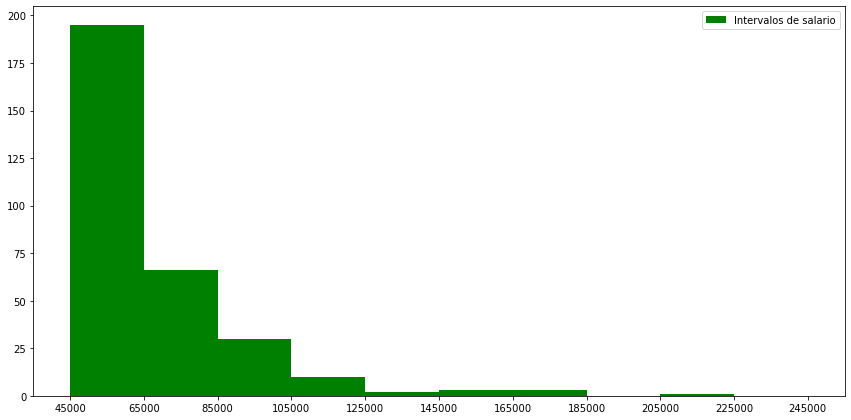

In [5]:
rango= list(range((df.Salary.min()//1000)*1000,df.Salary.max(), 20000)) #//1000*1000 es para truncarlo al millar

fig,ax= plt.subplots( figsize=(12,6))
fig.tight_layout()

ax.hist(x=df.Salary, bins=rango, color='green')
ax.set_xticks(rango) #Pone los ticks con el rango
ax.legend([f'Intervalos de salario'])
plt.show()

Los salarios más populares están entre 50000 y 70000

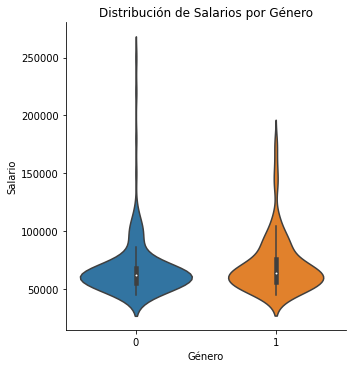

In [6]:
ax = sns.catplot(data=df, kind='violin', x='GenderID', y='Salary')
ax.set(xlabel='Género', ylabel='Salario', title='Distribución de Salarios por Género')

In [6]:
DateofHire = pd.to_datetime(df.DateofHire)
DateofHire

0     2011-07-05
1     2015-03-30
2     2011-07-05
3     2008-01-07
4     2011-07-11
         ...    
306   2014-07-07
307   2008-09-02
308   2010-04-10
309   2015-03-30
310   2014-09-29
Name: DateofHire, Length: 311, dtype: datetime64[ns]

In [9]:
Emp_count =  df.groupby(DateofHire)['EmpID'].count()
Emp_count

DateofHire
2006-01-09    1
2007-06-25    1
2007-11-05    1
2008-01-07    1
2008-09-02    1
             ..
2017-01-07    1
2017-02-10    1
2017-02-15    2
2017-04-20    2
2018-07-09    1
Name: EmpID, Length: 101, dtype: int64

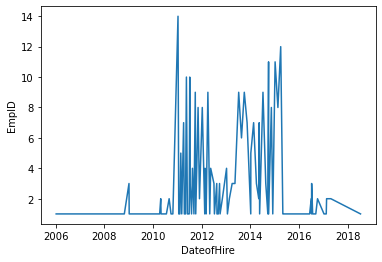

In [10]:
ax4 = sns.lineplot(data=Emp_count) #No se como solucionar el problema de las leyendas todos superpuestas en el eje x.
                                  #Como podría agrupar los valores del eje x por mes y luego graficarlos?

In [11]:
Emp_count =  df.groupby(DateofHire.dt.year)['EmpID'].count() #Asi se puede hacer en una linea
Emp_count

DateofHire
2006     1
2007     2
2008     3
2009     7
2010     9
2011    83
2012    45
2013    44
2014    60
2015    36
2016    14
2017     6
2018     1
Name: EmpID, dtype: int64

<AxesSubplot:xlabel='DateofHire'>

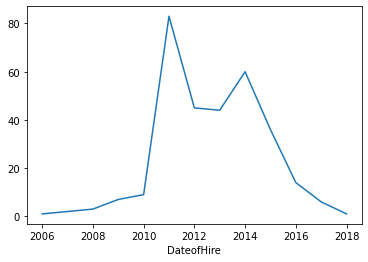

In [12]:
Emp_count.plot()

In [13]:
year=DateofHire.dt.year
month=DateofHire.dt.month
year=year.rename("Year")
month=month.rename("Month")

Emp_count =  df.groupby([year,month])['EmpID'].count().to_frame() #Asi se puede agrupar por año y mes

Emp_count

EmpID
Year Month       
2006 1          1
2007 6          1
     11         1
2008 1          1
     9          1
...           ...
2016 10         2
2017 1          1
     2          3
     4          2
2018 7          1

[70 rows x 1 columns]

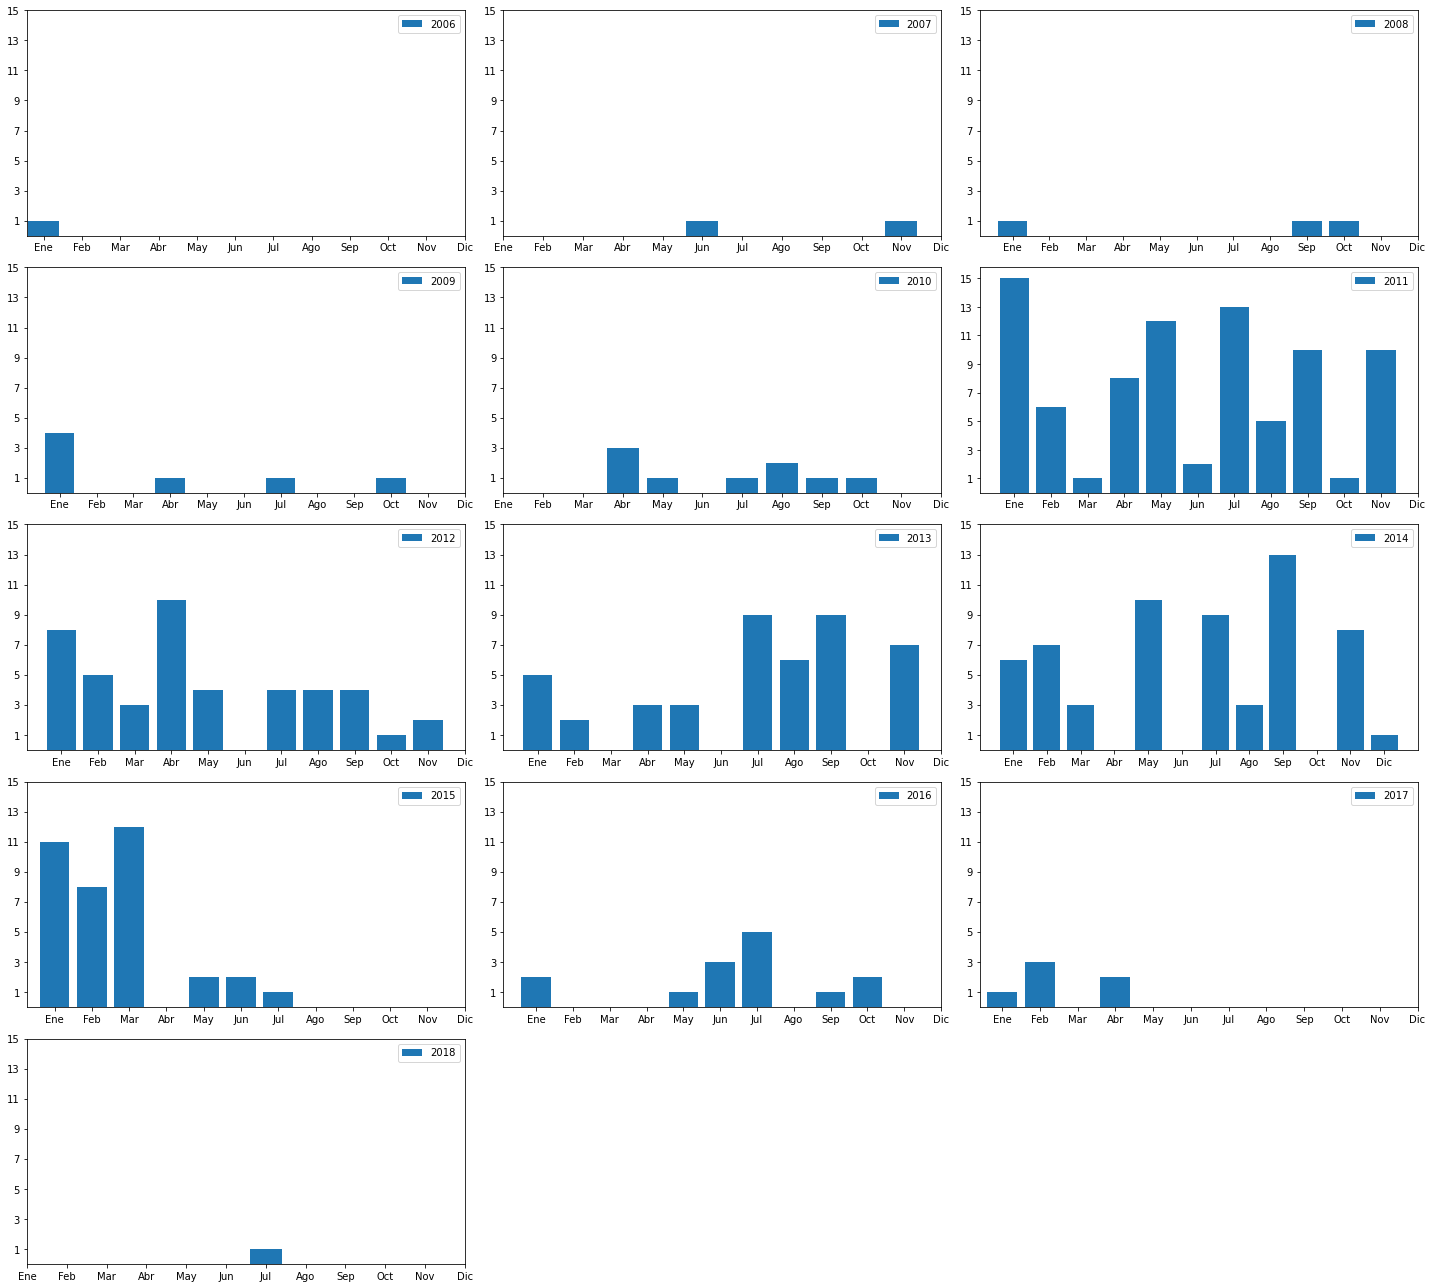

In [14]:
df['Year']= df.DateofHire.apply(lambda x: pd.to_datetime(x).year) #Años de la fecha
df['Month']= df.DateofHire.apply(lambda x: pd.to_datetime(x).month) #Meses de la fecha

anios=df['Year'].sort_values().unique() #Cantidad de años unicos
rows= len(anios)//3+1 #Cantidad de filas=division entera de cantidad de años unicos por 3  +1 
cols= len(anios)//5+1 #Cantidad de columnas=division entera de cantidad de años unicos por 5 +1
meses=list(range(1,13)) #Meses del 1 al 12
meses_label=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'] #Labels de los meses

lista_contratacion_por_mes= [df[df.Year == i].groupby('Month')['EmpID'].count().to_frame() for i in df['Year'].sort_values().unique() ]
#Esto es una lista de dfs en la que cada elemento es la cantidad de EmpID agrupados por mes para cada año

fig, ax=plt.subplots(figsize=(20,18), ncols=cols, nrows=rows)
idx=0 #Inicializas el valor para recorrer la lista con 0

for row in range(rows):
    for col in range(cols): #Esto es un for anidado. Primero va a la primera de row, recorre todas las col; Despues a la segunda de row, todas las cols ...
        if idx >= len(lista_contratacion_por_mes): #Si el indice es igual o mayor a la lista, que borre el ax asi no queda vacío. Aclaro que la longitud es 1 más que el indice máximo porque éste empieza en 0 y la longitud en 1
            ax[row,col].remove()
        else:
            ax[row,col].bar(lista_contratacion_por_mes[idx].index, lista_contratacion_por_mes[idx]['EmpID'].values, label=anios[idx]) #Grafico en si
            ax[row,col].set_xticks(meses)
            ax[row,col].set_yticks(range(1,17,2))
            ax[row,col].set_xticklabels(meses_label)
            ax[row,col].legend()
            idx+=1
            
plt.tight_layout() #Esto para que queden bien separados